In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('customer behavior.csv')
#載入資料

In [3]:
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
for d in data['Satisfaction Level']:
    print(d)

Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
nan
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisf

In [6]:
Satisfied = 0
Unsatisfied = 0
Neutral = 0
for d in data['Satisfaction Level']:
    if d == 'Satisfied':
        Satisfied +=1
    if d == 'Unsatisfied':
        Unsatisfied +=1
    if d == 'Neutral':
        Neutral +=1
print('Satisfied有', Satisfied, '個')
print('Unsatisfied有', Unsatisfied, '個')
print('Neutral有', Neutral, '個')
print('顧客滿意的比例為', round(Satisfied*100/350, 2), '%')
print('顧客不滿意的比例為', round(Unsatisfied*100/350, 2), '%')
print('顧客覺得中立的比例為', round(Neutral*100/350, 2), '%')

Satisfied有 125 個
Unsatisfied有 116 個
Neutral有 107 個
顧客滿意的比例為 35.71 %
顧客不滿意的比例為 33.14 %
顧客覺得中立的比例為 30.57 %


In [7]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null #找出缺失值在哪幾行

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [8]:
satisfied_count_rating_3_1 = data[data['Average Rating'] == 3.1]['Satisfaction Level'].value_counts()
satisfied_count_rating_3_1 #找出當rating=3.1時，顧客的滿意度為何

Neutral    16
Name: Satisfaction Level, dtype: int64

In [9]:
satisfied_count_rating_3_4 = data[data['Average Rating'] == 3.4]['Satisfaction Level'].value_counts()
satisfied_count_rating_3_4 #找出當rating=3.4時，顧客的滿意度為何

Neutral        17
Unsatisfied     1
Name: Satisfaction Level, dtype: int64

In [10]:
data['Satisfaction Level'] = data['Satisfaction Level'].fillna('Neutral')
#缺失值用看缺失那行的rating為何，再用rating去數顧客滿意度分別為何。以上來看當rating=3.1或3.4時，顧客滿意度最多的是Neutral

In [11]:
data.loc[71]

Customer ID                     172
Gender                       Female
Age                              37
City                        Houston
Membership Type              Bronze
Total Spend                   420.8
Items Purchased                   7
Average Rating                  3.1
Discount Applied              False
Days Since Last Purchase         21
Satisfaction Level          Neutral
Name: 71, dtype: object

In [12]:
data.info() #Satisfaction Level的缺失值補滿

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [14]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

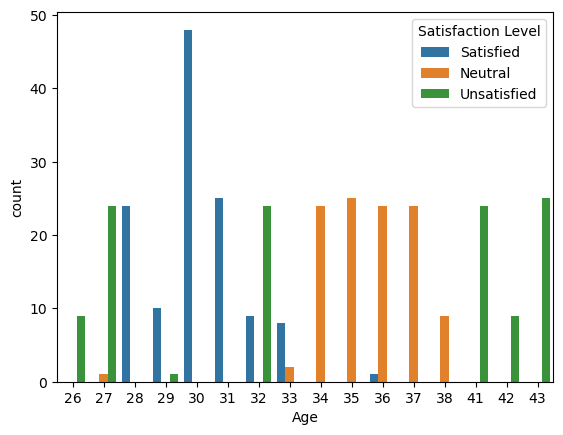

In [17]:
sns.countplot(x=data['Age'], hue=data['Satisfaction Level'])

<Axes: xlabel='Total Spend', ylabel='count'>

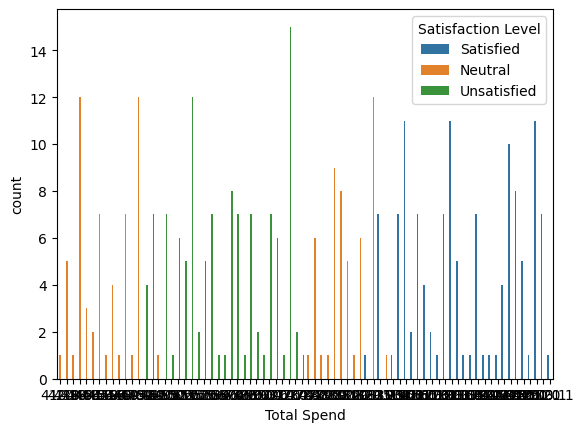

In [18]:
sns.countplot(x=data['Total Spend'], hue=data['Satisfaction Level'])

<Axes: xlabel='Average Rating', ylabel='count'>

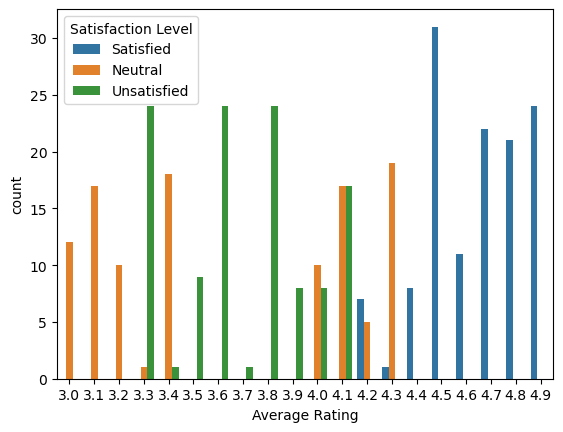

In [19]:
sns.countplot(x=data['Average Rating'], hue=data['Satisfaction Level'])

<Axes: xlabel='Gender', ylabel='count'>

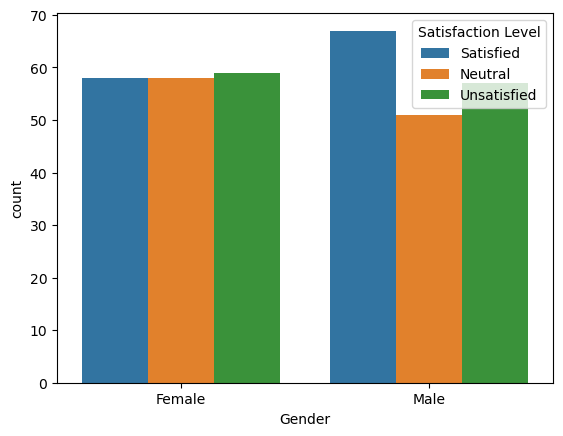

In [20]:
sns.countplot(x=data['Gender'], hue=data['Satisfaction Level'])

<Axes: xlabel='Discount Applied', ylabel='count'>

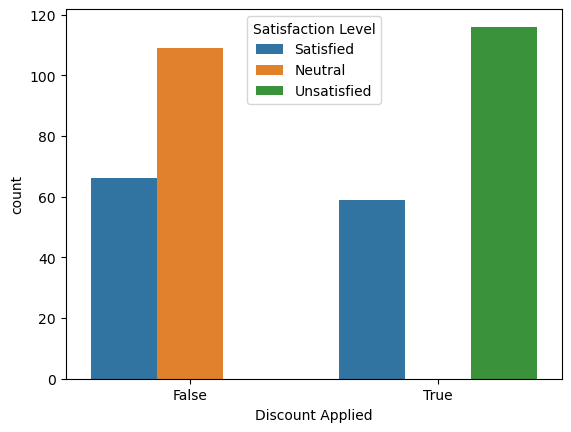

In [23]:
sns.countplot(x=data['Discount Applied'], hue=data['Satisfaction Level'])

<Axes: xlabel='City', ylabel='count'>

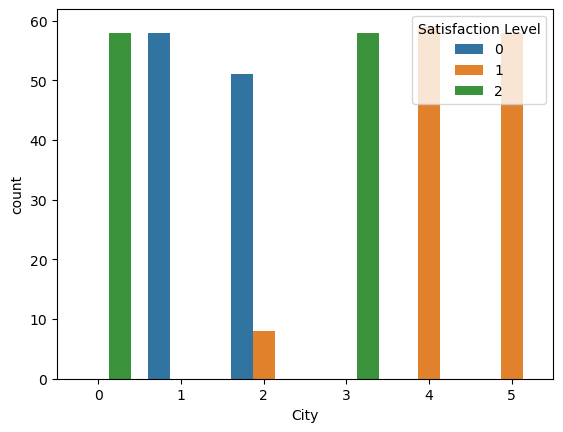

In [26]:
sns.countplot(x=data['City'], hue=data['Satisfaction Level'])

/Users/serene0215/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/serene0215/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/U

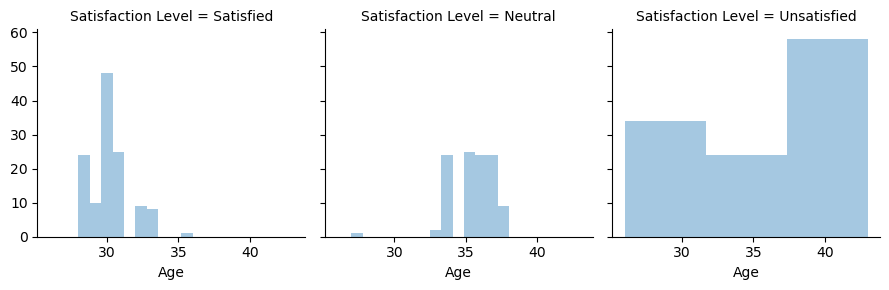

In [21]:
g = sns.FacetGrid(data, col='Satisfaction Level') #col='Satisfaction LevelSatisfaction Level'参数指定了按照'Satisfaction Level'列进行分组
g.map(sns.distplot, 'Age', kde=False)
#30歲後年齡層的整體滿意度最不好

data['Gender'] = data['Gender'].astype('category').cat.codes #Female=0,Male=1
data['City'] = data['City'].astype('category').cat.codes #Chicago=0,Huston=1,LA=2,
data['Membership Type'] = data['Membership Type'].astype('category').cat.codes
data['Total Spend'] = data['Total Spend'].astype('category').cat.codes
data['Discount Applied'] = data['Discount Applied'].astype('category').cat.codes
data['Satisfaction Level'] = data['Satisfaction Level'].astype('category').cat.codes

In [27]:
data['Gender'] = data['Gender'].astype('category').cat.codes#Female=0,Male=1
data['City'] = data['City'].astype('category').cat.codes#Chicago=0,Houston=1,LA=2,Miami=3,NY=4,San Francisco=5
data['Membership Type'] = data['Membership Type'].astype('category').cat.codes#Bronze=0,Gold=1,Silver=2
data['Discount Applied'] = data['Discount Applied'].astype('category').cat.codes#False=0,True=1
data['Satisfaction Level'] = data['Satisfaction Level'].astype('category').cat.codes#Neutral=0,Satisfied=1,Unsatisfied=2

In [28]:
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,51,14,4.6,1,25,1
1,102,1,34,2,2,40,11,4.1,0,18,0
2,103,0,43,0,0,21,9,3.4,1,42,2
3,104,1,30,5,1,72,19,4.7,0,12,1
4,105,1,27,3,2,36,13,4.0,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,26,10,3.8,1,42,2
346,447,0,36,1,0,12,8,3.0,0,27,0
347,448,0,30,4,1,60,16,4.5,1,28,1
348,449,1,34,2,2,39,11,4.2,0,21,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Gender','Age','City','Membership Type','Total Spend','Items Purchased','Average Rating','Discount Applied','Days Since Last Purchase']], data[['Satisfaction Level']], test_size=0.3, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=3,n_jobs=2)

In [33]:
forest.fit(X_train,y_train['Satisfaction Level'].values) #訓練模型

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=3)

In [37]:
predictions = forest.predict(X_test) #進行預測

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [40]:
X_train

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
166,1,26,3,2,32,12,3.9,1,47
287,0,30,4,1,61,16,4.7,1,24
141,1,30,5,1,70,20,4.8,0,13
81,1,30,5,1,70,20,4.8,0,13
1,1,34,2,2,40,11,4.1,0,18
...,...,...,...,...,...,...,...,...,...
323,0,30,4,1,60,16,4.5,1,27
192,0,30,4,1,60,16,4.5,1,20
117,1,28,5,1,74,21,4.9,0,10
47,0,36,1,0,12,8,3.0,0,18


In [41]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(forest.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
8,Days Since Last Purchase,0.303625
6,Average Rating,0.185171
4,Total Spend,0.162695
2,City,0.132686
7,Discount Applied,0.090043
5,Items Purchased,0.078271
1,Age,0.043699
0,Gender,0.003809
3,Membership Type,0.000000
